## Importações

In [13]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras
from keras import layers

import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pd.options.display.max_columns = None

## Ler Dados

### CSV

In [15]:
df = pd.read_csv('../data/arquivo_fe.csv')
df.shape

(299999, 23)

In [16]:
df.head()

,startingAirport,destinationAirport,elapsedDays,seatsRemaining,searchDateInDays,flightDateInDays,segment1AirlineName,segment2AirlineName,segment3AirlineName,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,segment3EquipmentDescription,segment4EquipmentDescription,daysDifferenceBetweenSearchAndFlightDate_mcat,totalTravelDistance_mcat,travelDurationInSeconds_mcat,totalFare,isBasicEconomy_True
0,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
1,0.0,1.0,0,4,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
2,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
3,0.0,1.0,0,8,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
4,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0


### Pickle

In [17]:
with open('../pkls/oe.pickle', 'rb') as handle:
    oe_enc = pickle.load(handle)

with open('../pkls/ohe.pickle', 'rb') as handle:
    ohe_enc = pickle.load(handle)

## Split

In [18]:
TARGET = 'totalFare'

In [19]:
x = df.copy()
y = x.pop(TARGET)

### Padronização

Notamos que após a primeira implementação, o loss estava muito alto, então isso pode ter ocorrido pela variação das escalas dos dados.

In [20]:
standard = StandardScaler().fit(x)

In [21]:
x_standard = standard.transform(x)

In [22]:
x_standard = pd.DataFrame(x_standard)

In [23]:
x_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
1,-1.579472,-1.374752,-0.409786,-0.393990,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
2,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,0.474148,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
3,-1.579472,-1.374752,-0.409786,0.953103,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
4,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456


Separamos 33% dos valores para teste.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.33, random_state=42)

In [25]:
x_train.shape, x_test.shape

((200999, 22), (99000, 22))

## Treinamento

Criamos 3 modelos para interpretar os dados.

### Model Alfa

O Model Alfa, possui 1 camada com 22 layers, com base o número de colunas, e a função de ativação relu.

In [26]:
model_alfa = keras.Sequential(name='Alfa')

model_alfa.add(layers.Input(shape=(x_train.shape[1], )))
model_alfa.add(layers.Dense(22, activation='relu'))
model_alfa.add(layers.Dense(1))

model_alfa.summary()

Model: "Alfa"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_alfa.compile(loss='mse')

#### 50 épocas

In [28]:
history_alfa = model_alfa.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

Com 50 épocas, o loss foi decaindo, com isso aumentamos para 100, visto que o modelo foi melhorando os resultados.

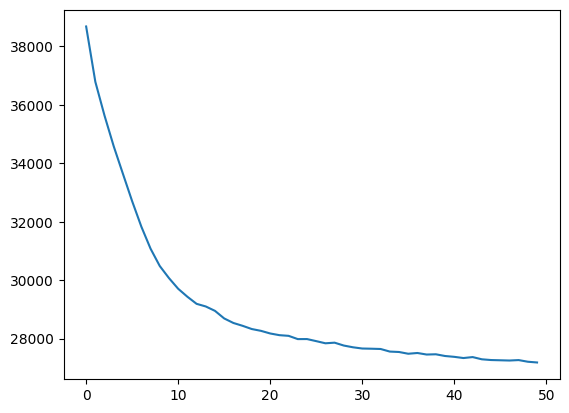

In [29]:
plt.plot(history_alfa.history['val_loss'])

#### 100 Épocas

In [30]:
history_alfa = model_alfa.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=None)

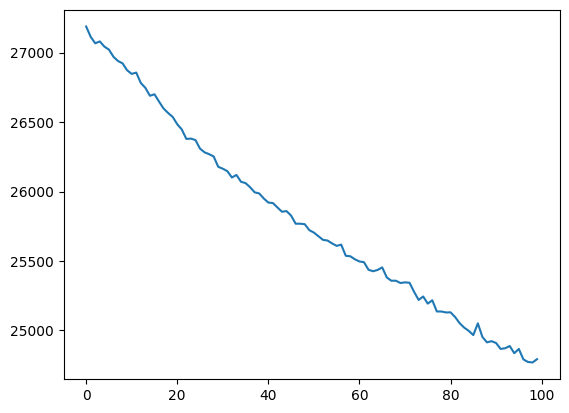

In [31]:
plt.plot(history_alfa.history['val_loss'])

#### 200 Épocas

In [39]:
history_alfa = model_alfa.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, verbose=None)

### Model Beta

In [42]:
model_beta = keras.Sequential(name='Beta')

model_beta.add(layers.Input(shape=(x_train.shape[1], )))
model_beta.add(layers.Dense(22*2, activation='relu'))
model_beta.add(layers.Dense(22, activation='relu'))
model_beta.add(layers.Dense(1))

model_beta.summary()

Model: "Beta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 44)             │         1,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,025 (7.91 KB)

 Trainable params: 2,025 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_beta.compile(loss='mse')

### Model Delta

In [44]:
model_delta = keras.Sequential(name='Delta')

model_delta.add(layers.Input(shape=(x_train.shape[1], )))
model_delta.add(layers.Dense(22*8, activation='relu'))
model_delta.add(layers.Dense(22*4, activation='relu'))
model_delta.add(layers.Dense(22*2, activation='relu'))
model_delta.add(layers.Dense(22, activation='relu'))
model_delta.add(layers.Dense(1))

model_delta.summary()

Model: "Delta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 176)            │         4,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 88)             │        15,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 44)             │         3,916 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,553 (95.91 KB)

 Trainable params: 24,553 (95.91 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_delta.compile(loss='mse')

## Avaliação do modelo

Após o treinamento, o modelo foi avaliado utilizando as métricas:

- Erro Quadrático Médio (MSE): Mede o erro médio ao quadrado entre os valores previstos e reais. Quanto menor, melhor.
- Erro Absoluto Médio (MAE): Mede o erro médio absoluto entre os valores previstos e reais. Quanto menor, melhor.
- R² (Coeficiente de Determinação): Mede o quanto o modelo explica da variabilidade dos dados. Varia de 0 a 1 (quanto mais próximo de 1, melhor).

Os resultados mostraram os valores dessas métricas, permitindo analisar se o modelo está com desempenho satisfatório ou se precisa de ajustes (como mais dados, engenharia de atributos ou ajuste de hiperparâmetros).
Além disso, foi gerado um gráfico de dispersão entre os valores reais e previstos, permitindo visualizar se o modelo está prevendo bem ou se há muitos desvios.

Essas métricas são apropriadas para problemas de regressão, como é o caso do target 'totalFare'.

3094/3094 ━━━━━━━━━━━━━━━━━━━━ 2s 774us/step
Erro Quadrático Médio (MSE): 23094.03297121408
Erro Absoluto Médio (MAE): 97.14505614483498
R²: 0.5578547963120993


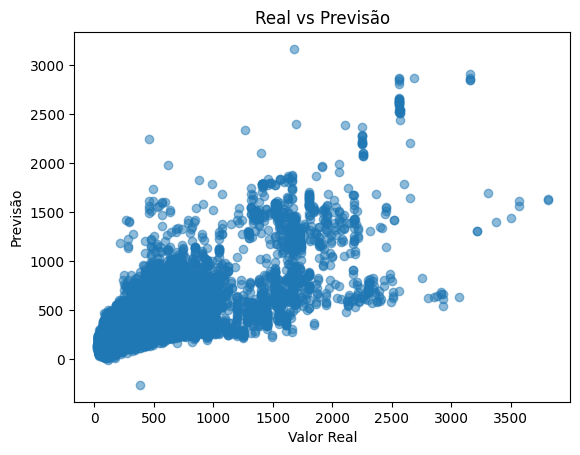

In [46]:
y_pred = model_alfa.predict(x_test).flatten()

# Avaliação
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Resultados
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor Real")
plt.ylabel("Previsão")
plt.title("Real vs Previsão")
plt.show()

O Gráfico de dispersão acima mostra a relação entre os valores reais e os valores previstos pelo modelo para o Alvo (Target).

- Eixo X: Valores reais das tarifas aéreas (totalFare) do conjunto de teste.
- Eixo Y: Valores previstos pelo modelo para essas mesmas amostras.

Cada ponto representa uma amostra do conjunto de teste.
Se o modelo fosse perfeito, todos os pontos estariam alinhados em uma linha reta de 45° (onde valor real = valor previsto).
Quanto mais próximos dessa linha os pontos estiverem, melhor o desempenho do modelo.
Se houver muita dispersão ou pontos distantes da linha, indica que o modelo está cometendo erros maiores nas previsões.

Esse gráfico é útil para visualizar se o modelo está prevendo bem ou se há muitos desvios entre o real e o previsto.